In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('laptop_data.csv')

In [173]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

droping useless column

In [174]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [175]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

# COMPANY COLUMN 

In [176]:
df['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

finding number of laptop of companies

<Axes: xlabel='Company'>

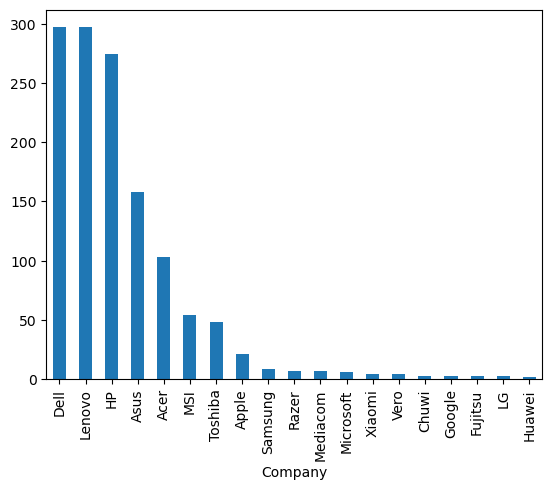

In [177]:
df['Company'].value_counts().plot(kind='bar')
# DELL , LENOVO AND HP HAVE MAXIMUM LAPTOPS IN THIS DATA

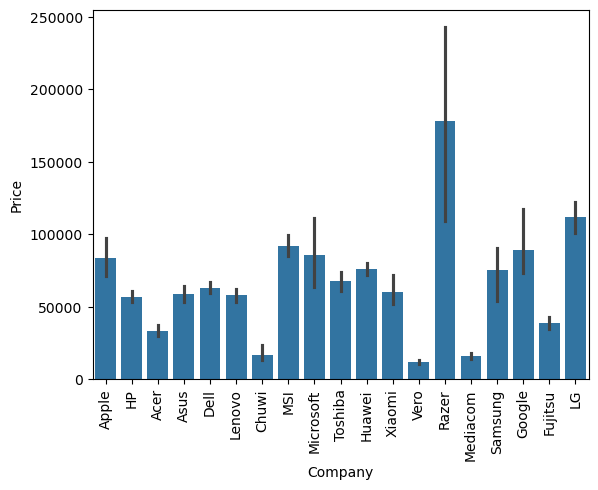

In [178]:
sns.barplot(x = df['Company'] ,y =  df['Price'])
plt.xticks(rotation='vertical')
plt.show()
#RAZER HAS MOST EXPENSIVEW LAPTOPS FOLLWED NY LG , GOOGLE , MICROSOFT

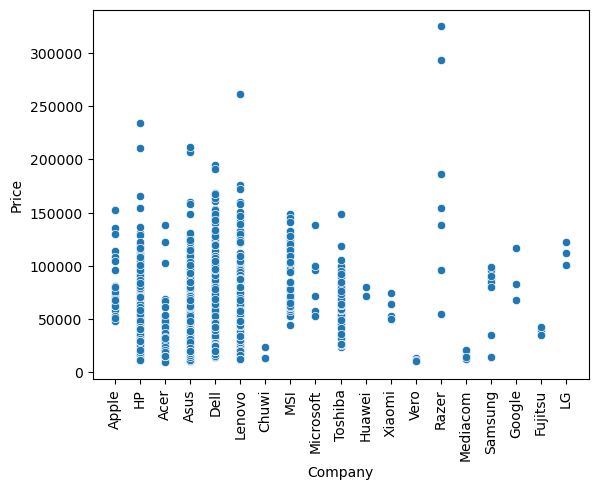

In [179]:
sns.scatterplot(x=df['Company'] ,y= df['Price'])
plt.xticks(rotation='vertical')
plt.show()

# Type Name Column

In [180]:
df['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

<Axes: xlabel='TypeName'>

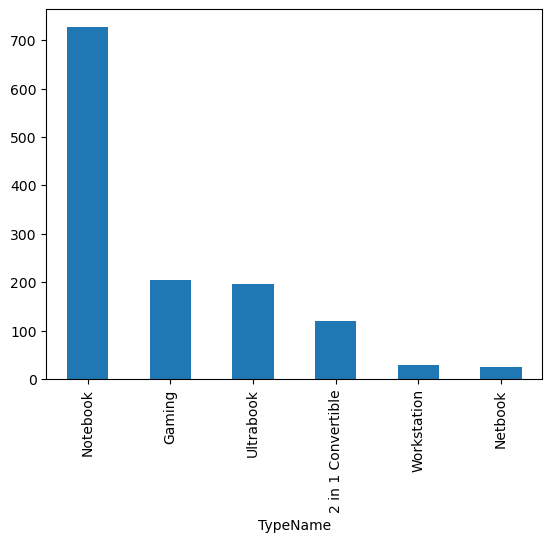

In [181]:
df['TypeName'].value_counts().plot(kind='bar')
# POPULATIRY LEVEL IS NOTEBOOK >GAMING > ULTRABOOK>2 IN 1 > WORKSTATION > NETBOOK   

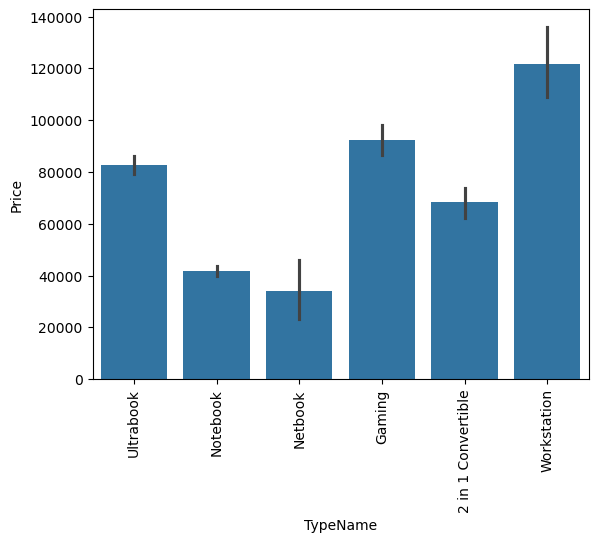

In [182]:
sns.barplot(x= df['TypeName'] , y = df['Price'])
plt.xticks(rotation='vertical')
plt.show()
# WORKSTATION ARE THE MOST EXPENSIVE FOLLOWED NY GAMING AND ULTRABOOK

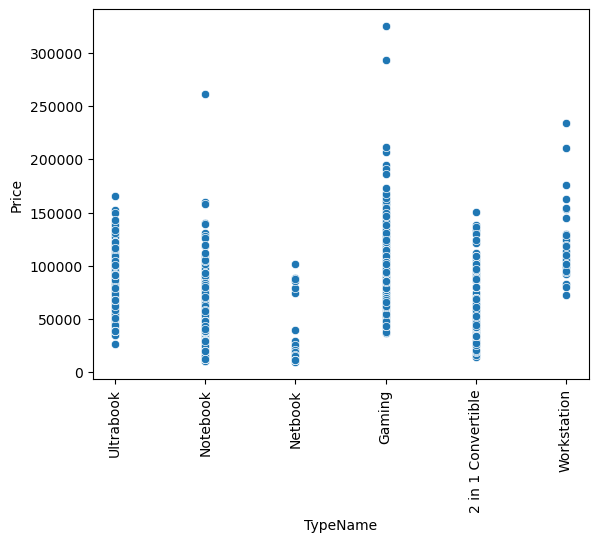

In [183]:
sns.scatterplot(x=df['TypeName'] ,y= df['Price'])
plt.xticks(rotation='vertical')
plt.show()

# Inches

In [184]:
df['Inches'].unique()

array([13.3, 15.6, 15.4, 14. , 12. , 11.6, 17.3, 10.1, 13.5, 12.5, 13. ,
       18.4, 13.9, 12.3, 17. , 15. , 14.1, 11.3])

<Axes: xlabel='Inches'>

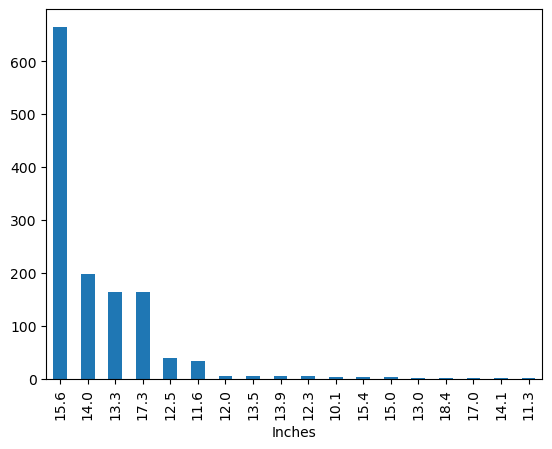

In [185]:
df['Inches'].value_counts().plot(kind='bar')
# 15.6 incles laptop are most popular

<Axes: ylabel='Density'>

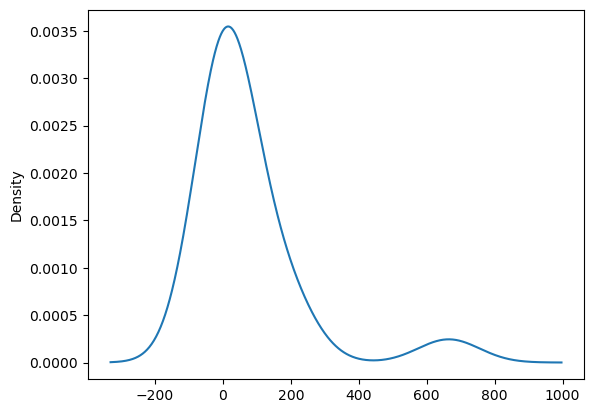

In [186]:
df['Inches'].value_counts().plot(kind='kde')

<Axes: >

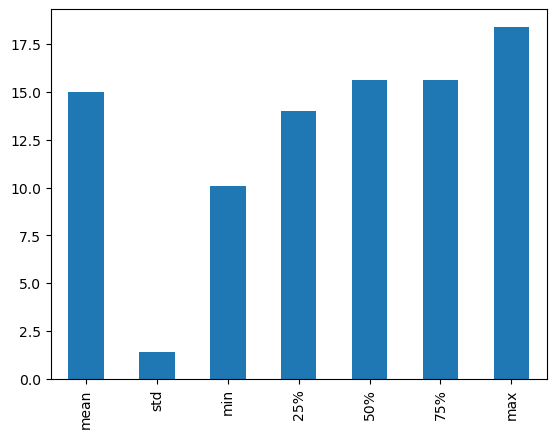

In [187]:
df['Inches'].describe().drop('count').plot(kind='bar')

In [188]:
# df['Inches'] = np.log(df['Inches'])

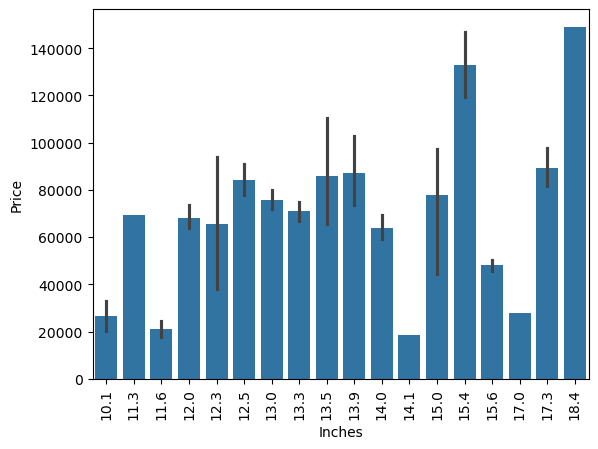

In [189]:
sns.barplot(x= df['Inches'] , y = df['Price'])
plt.xticks(rotation='vertical')
plt.show()

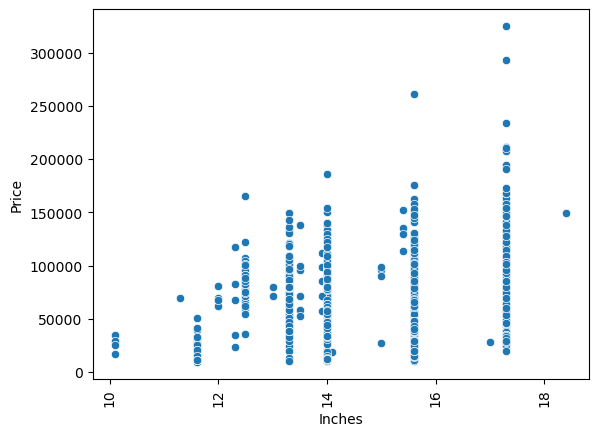

In [190]:
sns.scatterplot(x=df['Inches'] ,y= df['Price'])
plt.xticks(rotation='vertical')
plt.show()

# ScreenResolution

<Axes: xlabel='ScreenResolution'>

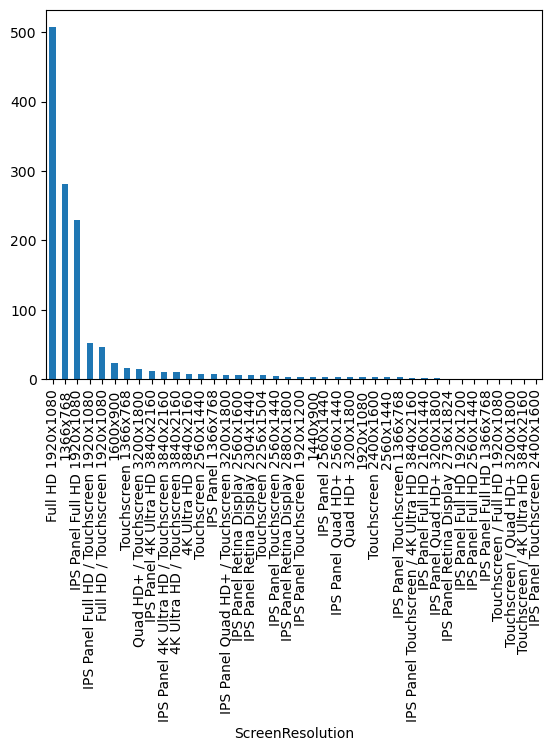

In [191]:
df['ScreenResolution'].value_counts().plot(kind='bar')
# some laptops are touchscreen

In [192]:
df['touchscreen'] = df['ScreenResolution'].apply(lambda x : 1 if 'Touchscreen' in x else 0) 

In [193]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen
498,Lenovo,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.4kg,50562.7200,0
394,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,AMD Radeon R7 M445,Linux,2.33kg,41498.1936,0
1094,HP,Netbook,12.5,1366x768,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 7,2.4kg,85194.7200,0
157,Asus,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.1kg,70063.2000,1
898,Dell,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M420X,Windows 10,2.18kg,32713.9200,0


In [194]:
df['ScreenResolution'] = df['ScreenResolution'].str.replace('Touchscreen','')

In [195]:
temp = df['ScreenResolution'].str.split('x' , expand=True)

In [196]:
df['y_res'] =  temp[1]

In [197]:
df['x_res'] = temp[0].apply(lambda x : ''.join(x.split()[-1::]))

In [198]:
df['x_res'] = df['x_res'].astype(int)
df['y_res'] = df['y_res'].astype(int)


In [199]:
df['ScreenResolution'] = df['ScreenResolution'].apply(lambda x : 1 if 'IPS' in x else 0)


In [200]:
df['IPS'] = df['ScreenResolution']

In [201]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,y_res,x_res,IPS
0,Apple,Ultrabook,13.3,1,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1600,2560,1
1,Apple,Ultrabook,13.3,0,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,900,1440,0
2,HP,Notebook,15.6,0,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,1080,1920,0
3,Apple,Ultrabook,15.4,1,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1800,2880,1
4,Apple,Ultrabook,13.3,1,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1600,2560,1


In [202]:
df.drop('ScreenResolution',axis=1 , inplace=True)

# CPU

In [203]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

<Axes: xlabel='Cpu'>

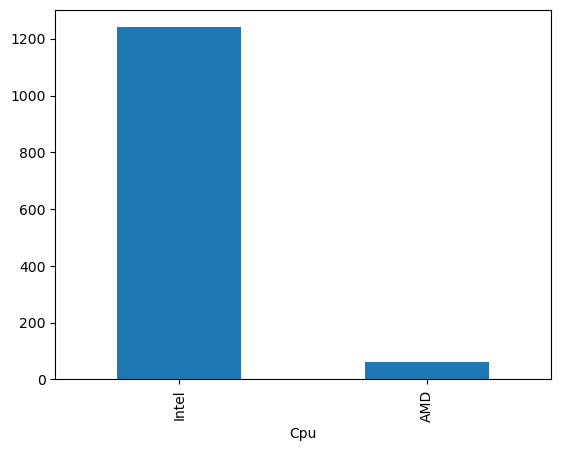

In [204]:
cpu_type  = df['Cpu'].apply(lambda x: 'Intel' if "Intel"in x else 'AMD')
cpu_type.value_counts().plot(kind='bar')

In [205]:
df['Cpu'] = df['Cpu'].apply(lambda x : " ".join(x.split()[0:3]))

<Axes: xlabel='Cpu'>

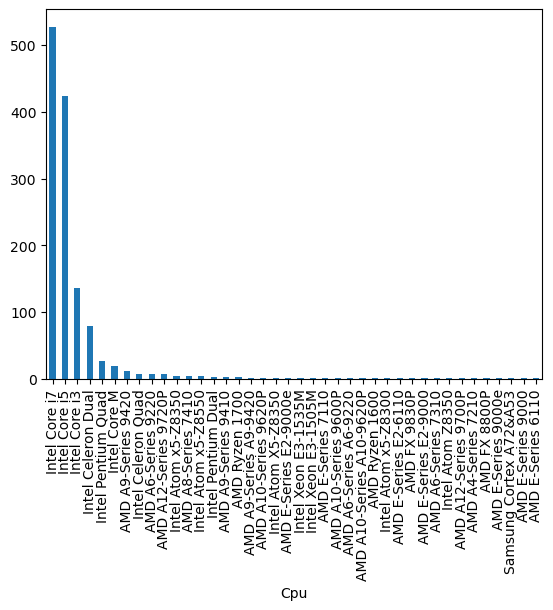

In [206]:
df['Cpu'].value_counts().plot(kind='bar')

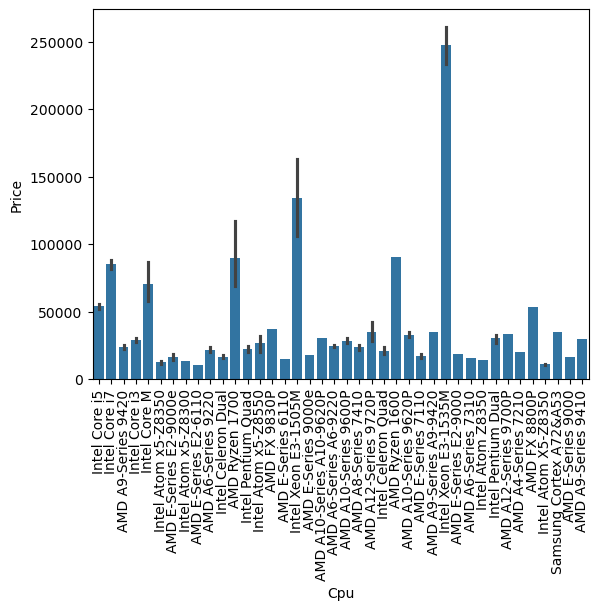

In [207]:
sns.barplot(x= df['Cpu'] , y= df['Price'])
plt.xticks(rotation= 'vertical')
plt.show()

# RAM

<Axes: xlabel='Ram'>

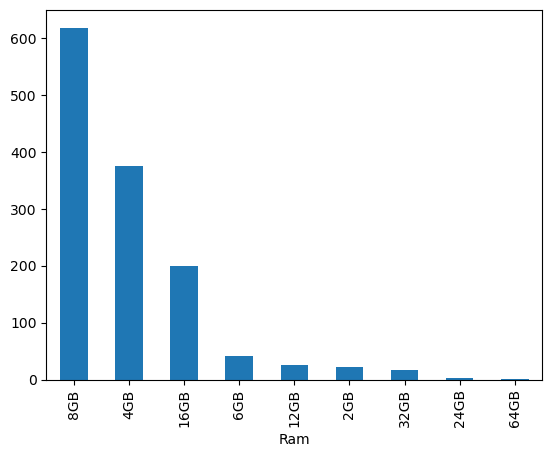

In [208]:
df['Ram'].value_counts().plot(kind='bar')

In [209]:
df['Ram'] = df['Ram'].str.replace('GB','').str.strip()

In [210]:
df['Ram'] = df['Ram'].astype(int)

<Axes: >

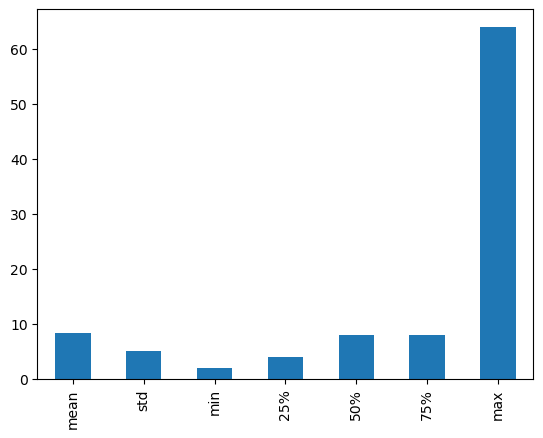

In [211]:
df['Ram'].describe().drop('count').plot(kind='bar')

# MEMORY

<Axes: xlabel='Memory'>

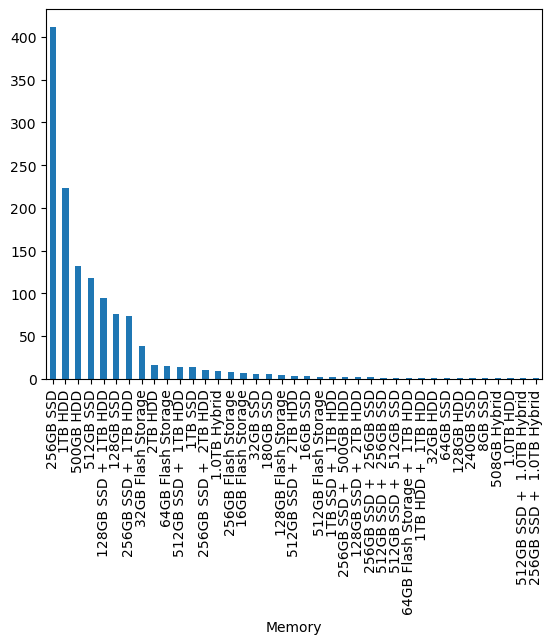

In [212]:
df['Memory'].value_counts().plot(kind='bar')

In [213]:
df['Memory'] = df['Memory'].str.replace('GB','').str.replace('TB','000')
df['Memory'] = df['Memory'].str.replace('1.0000','1000')
df['HDD']= df['Memory'].apply(lambda x : 1 if 'HDD' in x else 0)
df['SSD']= df['Memory'].apply(lambda x : 1 if 'SSD' in x else 0)
df['Flash_Storage']= df['Memory'].apply(lambda x : 1 if 'Flash Storage' in x else 0)
df['Hybrid'] = df['Memory'].apply(lambda x: 1 if 'Hybrid' in x else 0 )


In [214]:
df['Memory'] = df['Memory'].str.split(" ")

In [215]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,y_res,x_res,IPS,HDD,SSD,Flash_Storage,Hybrid
0,Apple,Ultrabook,13.3,Intel Core i5,8,"[128, SSD]",Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1600,2560,1,0,1,0,0
1,Apple,Ultrabook,13.3,Intel Core i5,8,"[128, Flash, Storage]",Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,900,1440,0,0,0,1,0
2,HP,Notebook,15.6,Intel Core i5,8,"[256, SSD]",Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,1080,1920,0,0,1,0,0
3,Apple,Ultrabook,15.4,Intel Core i7,16,"[512, SSD]",AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1800,2880,1,0,1,0,0
4,Apple,Ultrabook,13.3,Intel Core i5,8,"[256, SSD]",Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1600,2560,1,0,1,0,0


In [216]:
df['SSD'] = df['Memory'].apply(lambda x : x[x.index('SSD')-1] if 'SSD' in x else 0 )

In [217]:
df['HDD'] = df['Memory'].apply(lambda x : x[x.index('HDD')-1] if 'HDD' in x else 0 )
df['Flash_Storage'] = df['Memory'].apply(lambda x : x[x.index('Flash')-1] if 'Flash' in x else 0 )


In [218]:
df[(df['HDD'] != 0) & (df['SSD'] !=0)]

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,y_res,x_res,IPS,HDD,SSD,Flash_Storage,Hybrid
21,Lenovo,Gaming,15.6,Intel Core i5,8,"[128, SSD, +, , 1000, HDD]",Nvidia GeForce GTX 1050,Windows 10,2.5kg,53226.72,0,1080,1920,1,1000,128,0,0
37,Dell,Notebook,17.3,Intel Core i5,8,"[128, SSD, +, , 1000, HDD]",AMD Radeon 530,Windows 10,2.8kg,52161.12,0,1080,1920,1,1000,128,0,0
41,Dell,Gaming,15.6,Intel Core i7,16,"[256, SSD, +, , 1000, HDD]",Nvidia GeForce GTX 1060,Windows 10,2.65kg,79866.72,0,1080,1920,1,1000,256,0,0
47,Asus,Gaming,17.3,AMD Ryzen 1700,8,"[256, SSD, +, , 1000, HDD]",AMD Radeon RX 580,Windows 10,3.2kg,69210.72,0,1080,1920,0,1000,256,0,0
58,MSI,Gaming,17.3,Intel Core i7,16,"[256, SSD, +, , 2000, HDD]",Nvidia GeForce GTX 1070,Windows 10,2.43kg,130482.72,0,1080,1920,0,2000,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,MSI,Gaming,15.6,Intel Core i7,8,"[128, SSD, +, , 1000, HDD]",Nvidia GeForce GTX 960M,Windows 10,2.3kg,62284.32,0,1080,1920,0,1000,128,0,0
1245,Asus,Gaming,15.6,Intel Core i7,16,"[256, SSD, +, , 1000, HDD]",Nvidia GeForce GTX 1050 Ti,Windows 10,2.5kg,85248.00,0,1080,1920,1,1000,256,0,0
1247,Asus,Gaming,15.6,Intel Core i7,16,"[256, SSD, +, , 1000, HDD]",Nvidia GeForce GTX 1070,Windows 10,2.34kg,123876.00,0,1080,1920,1,1000,256,0,0
1256,Asus,Gaming,17.3,Intel Core i7,16,"[128, SSD, +, , 1000, HDD]",Nvidia GeForce GTX 970M,Windows 10,4.0kg,101232.00,0,1080,1920,1,1000,128,0,0


In [219]:
df.drop('Memory' ,axis=1, inplace=True)

In [220]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,touchscreen,y_res,x_res,IPS,HDD,SSD,Flash_Storage,Hybrid
0,Apple,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1600,2560,1,0,128,0,0
1,Apple,Ultrabook,13.3,Intel Core i5,8,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,900,1440,0,0,0,128,0
2,HP,Notebook,15.6,Intel Core i5,8,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,1080,1920,0,0,256,0,0
3,Apple,Ultrabook,15.4,Intel Core i7,16,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1800,2880,1,0,512,0,0
4,Apple,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1600,2560,1,0,256,0,0


# GPU

In [221]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [222]:
df['Gpu_Brand'] = df['Gpu'].apply(lambda x: x.split()[0])

<Axes: xlabel='Gpu_Brand'>

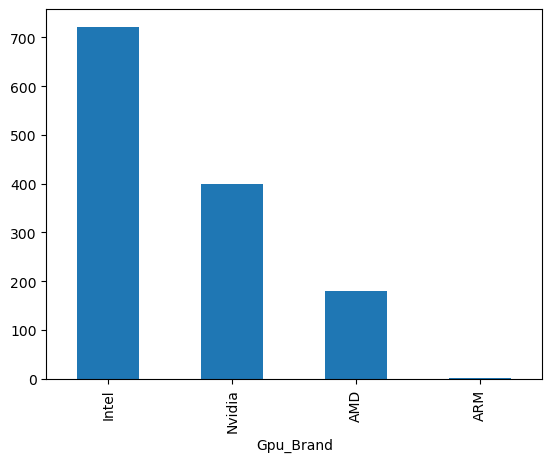

In [223]:
df['Gpu_Brand'].value_counts().plot(kind='bar')

In [224]:
df= df[df['Gpu_Brand'] != 'ARM']

In [225]:
new = df['Gpu'].apply(lambda x : " ".join(x.split()[-1::]))
new1 = df['Gpu'].apply(lambda x : " ".join(x.split()[0:1:]))
df['Gpu'] =  new1 + " " + new

In [226]:
# df['Gpu'] = df['Gpu'].str.replace('GeForce','').str.replace('Graphics',' ').str.replace('GTX','').str.replace('  ',' ')

In [227]:
# [i for i in df['Gpu'] if '1080' in i]

In [228]:
# [i for i in df['Gpu'] if 'Graphics' in i]

In [229]:
df['Gpu'].value_counts()

Gpu
Intel 620         351
Intel 520         185
Nvidia 1050        66
Nvidia 940MX       52
Nvidia 1060        48
                 ... 
AMD R17M-M1-70      1
Nvidia SLI          1
AMD 555             1
AMD 455             1
Nvidia M3000M       1
Name: count, Length: 89, dtype: int64

# OpSys

<Axes: xlabel='OpSys'>

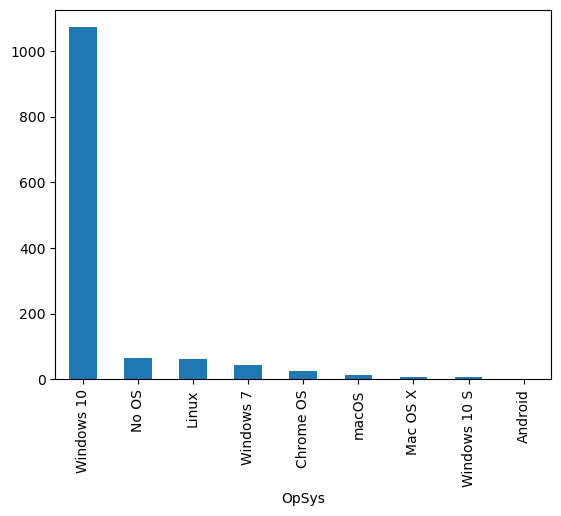

In [230]:
df['OpSys'].value_counts().plot(kind='bar')

In [231]:
def change(inp):
    if 'Windows' in inp:
        return 'Windows'
    if 'Mac' in inp or 'mac' in inp:
        return 'Mac'
    else:
        return 'Others'


In [232]:
df['OpSys'] = df['OpSys'].apply(lambda x: change(x))

<Axes: xlabel='OpSys'>

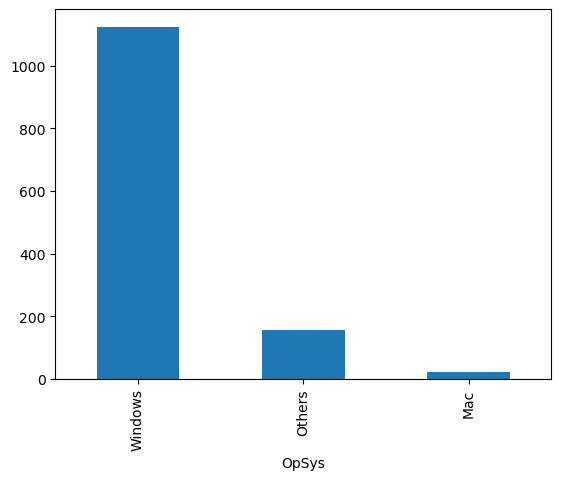

In [233]:
df['OpSys'].value_counts().plot(kind='bar')

# weight

In [234]:
df['Weight'] = df['Weight'].str.replace('kg','')

In [235]:
df['Weight'] = df['Weight'].astype(float)

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1302 non-null   object 
 1   TypeName       1302 non-null   object 
 2   Inches         1302 non-null   float64
 3   Cpu            1302 non-null   object 
 4   Ram            1302 non-null   int32  
 5   Gpu            1302 non-null   object 
 6   OpSys          1302 non-null   object 
 7   Weight         1302 non-null   float64
 8   Price          1302 non-null   float64
 9   touchscreen    1302 non-null   int64  
 10  y_res          1302 non-null   int32  
 11  x_res          1302 non-null   int32  
 12  IPS            1302 non-null   int64  
 13  HDD            1302 non-null   object 
 14  SSD            1302 non-null   object 
 15  Flash_Storage  1302 non-null   object 
 16  Hybrid         1302 non-null   int64  
 17  Gpu_Brand      1302 non-null   object 
dtypes: float64(3)

In [237]:
df['HDD'] = df['HDD'].astype(int)
df['SSD'] = df['SSD'].astype(int)
df['Flash_Storage'] = df['Flash_Storage'].astype(int)

# BIVARIATE ANALYSIS

### Company and Typename

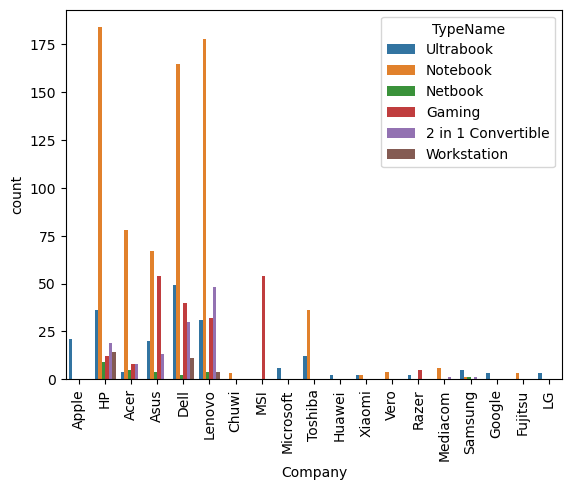

In [238]:
sns.countplot(x=df['Company'] , hue=df['TypeName'])
plt.xticks(rotation='vertical')
plt.show()
# HP is the biggedt producer of Notebook and Netbook
# Dell is the biigest producer of ultrabook amd workstation
# MSI is the biigest producer of Gaming laptop
# Lenevo is the bigest producer of 2 in 1 convertible
# Workstation is the least produced type

### Company and OpSys

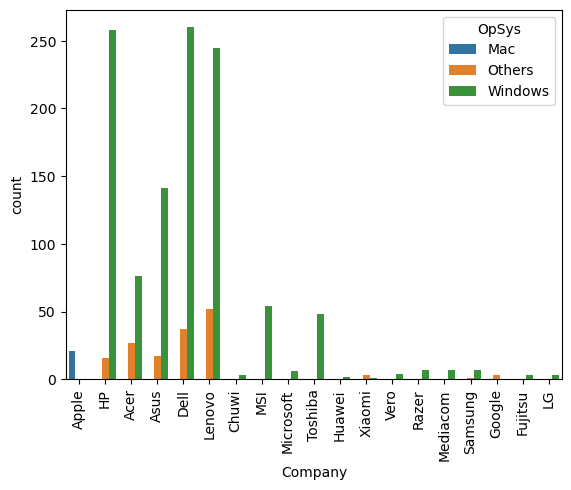

In [239]:
sns.countplot(x=df['Company'] , hue=df['OpSys'])
plt.xticks(rotation='vertical')
plt.show()
# All companies expect apple and google use windows
# Apple only uses mac while google uses other OS than mac and windows
# Lenevo has the other OS systems

### company and weight

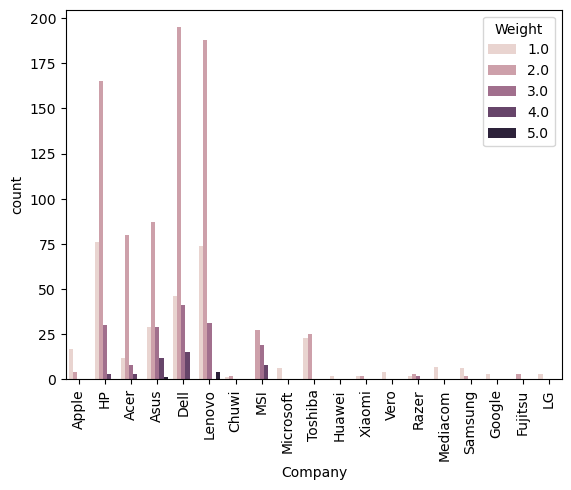

In [240]:
sns.countplot(x=df['Company'] , hue=df['Weight'].round())
plt.xticks(rotation='vertical')
plt.show()
# LENEVO HAS SOME OF THE HEAVIEST LAPTOPS
# HP AND LENEVO MAKES THE LIGHEST LAPTOPS
# APPLE LAPTOPS ARE EASY TO CARRY 

### touchscreen and company

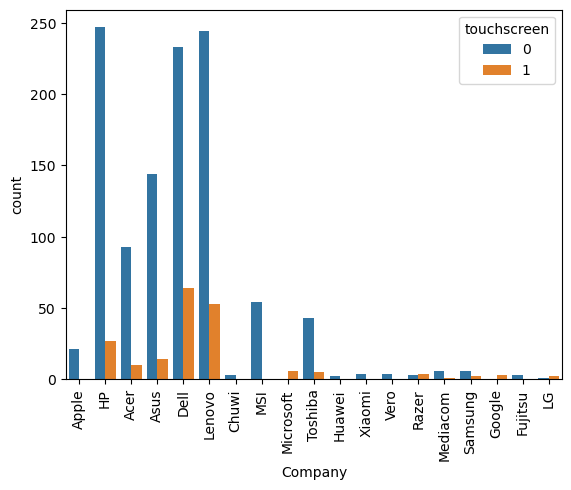

In [241]:
sns.countplot(x=df['Company'] , hue=df['touchscreen'])
plt.xticks(rotation='vertical')
plt.show()
# Dell produces the mamimumamount of touchscreen laptop
# Touchscreen laptops have very less production.

### IPS AND TOUCHSCREEN

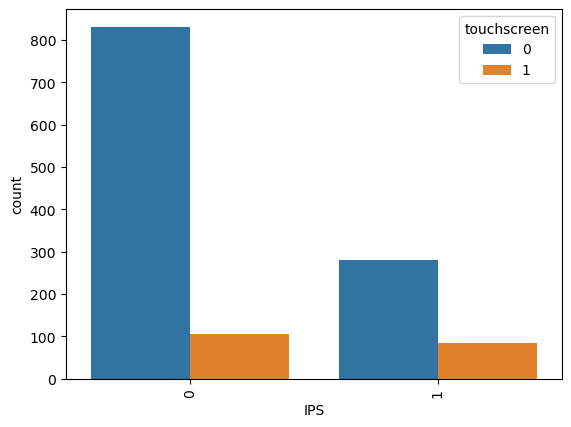

In [242]:
sns.countplot(x=df['IPS'] , hue=df['touchscreen'])
plt.xticks(rotation='vertical')
plt.show()

### touchscreen and price

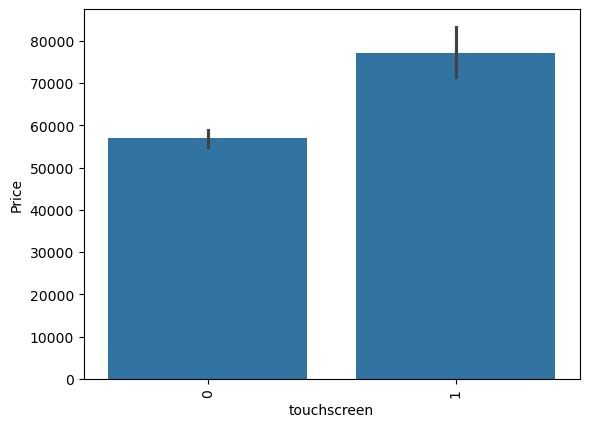

In [243]:
sns.barplot(x=df['touchscreen'] , y = df['Price'])
plt.xticks(rotation='vertical')
plt.show()
# touchscreen laptps are more expensive

# heatmap

In [244]:
df.corr(numeric_only=True) 

,Inches,Ram,Weight,Price,touchscreen,y_res,x_res,IPS,HDD,SSD,Flash_Storage,Hybrid
Inches,1.000000,0.237129,0.827397,0.067329,-0.359514,-0.092934,-0.069875,-0.112726,0.531531,-0.110636,-0.228868,0.049481
Ram,0.237129,1.000000,0.383362,0.742905,0.118875,0.426357,0.434095,0.207949,0.097399,0.604088,-0.059612,0.033795
Weight,0.827397,0.383362,1.000000,0.209867,-0.293004,-0.052041,-0.031866,0.018643,0.515632,-0.063507,-0.179165,0.090125
Price,0.067329,0.742905,0.209867,1.000000,0.192917,0.554591,0.557369,0.253320,-0.096122,0.676066,-0.040067,0.007003
touchscreen,-0.359514,0.118875,-0.293004,0.192917,1.000000,0.355756,0.350097,0.148026,-0.208805,0.256758,-0.020809,-0.039990
y_res,-0.092934,0.426357,-0.052041,0.554591,0.355756,1.000000,0.994480,0.287404,-0.136621,0.526886,0.014996,-0.005575
x_res,-0.069875,0.434095,-0.031866,0.557369,0.350097,0.994480,1.000000,0.280588,-0.125343,0.534516,-0.017177,-0.004011
IPS,-0.112726,0.207949,0.018643,0.253320,0.148026,0.287404,0.280588,1.000000,-0.092953,0.228870,0.068616,-0.024264
HDD,0.531531,0.097399,0.515632,-0.096122,-0.208805,-0.136621,-0.125343,-0.092953,1.000000,-0.400915,-0.117311,-0.077548
SSD,-0.110636,0.604088,-0.063507,0.676066,0.256758,0.526886,0.534516,0.228870,-0.400915,1.000000,-0.148321,-0.062066


<Axes: >

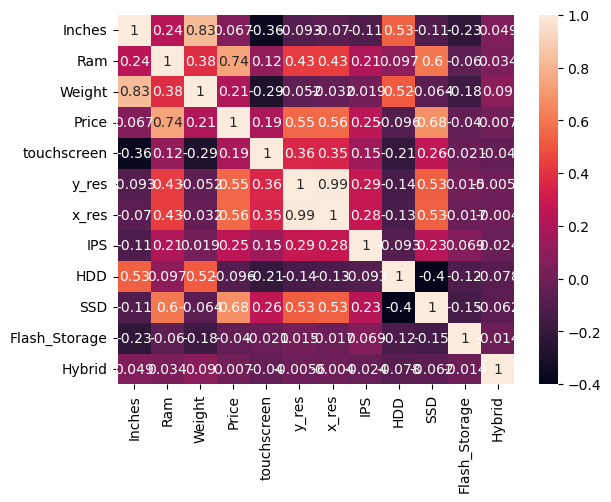

In [245]:
sns.heatmap(df.corr(numeric_only=True) , annot=True)

In [246]:
df.sample(5)

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,touchscreen,y_res,x_res,IPS,HDD,SSD,Flash_Storage,Hybrid,Gpu_Brand
591,Lenovo,Notebook,15.6,AMD A12-Series 9720P,12,AMD 530,Windows,2.200,50562.7200,0,1080,1920,0,0,512,0,0,AMD
501,HP,Notebook,15.6,Intel Core i5,8,AMD 520,Windows,1.910,32979.7872,0,768,1366,0,0,256,0,0,AMD
811,MSI,Gaming,17.3,Intel Core i7,16,Nvidia 1070,Windows,2.900,128671.2000,0,1080,1920,0,1000,512,0,0,Nvidia
457,Microsoft,Ultrabook,13.5,Intel Core M,4,Intel 615,Windows,1.252,52693.9200,1,1504,2256,0,0,128,0,0,Intel
258,MSI,Gaming,17.3,Intel Core i7,16,Nvidia 1070,Windows,4.140,133146.7200,0,1080,1920,0,1000,512,0,0,Nvidia


In [247]:
df.drop(['Flash_Storage','Hybrid'], axis=1,inplace=True)

# Creating a model

removing skewness from price by applying log transformation

<Axes: >

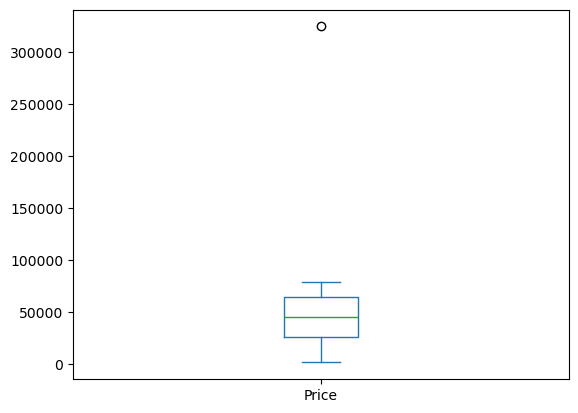

In [248]:
df['Price'].describe().plot(kind='box')

In [249]:
X = df.drop('Price',axis=1)
y = np.log(df['Price'])

In [250]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(X[['Company', 'TypeName' , 'Cpu','Gpu', 'OpSys','Gpu_Brand']])

OneHotEncoder()

In [251]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error
cf = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Company', 'TypeName' , 'Cpu', 'Gpu', 'OpSys','Gpu_Brand']),remainder='passthrough')

In [252]:
from sklearn.model_selection import train_test_split
r2score = []
meanerror = []
for i in range(1000):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=i)
    lr = XGBRegressor()
    pipe = make_pipeline(cf,lr)
    pipe.fit(x_train,y_train)
    y_pred = pipe.predict(x_test)
    r2score.append(r2_score(y_test,y_pred)) 
    meanerror.append(mean_absolute_error(y_test,y_pred))
    

In [253]:

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=np.argmax(r2score)) 
lr =XGBRegressor()
pipe = make_pipeline(cf,lr)
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print('r2_sore:',r2_score(y_test,y_pred))
print('mean_absolute_error:', mean_absolute_error(y_test,y_pred))
print('mean_squared_error', mean_squared_error(y_test,y_pred))

r2_sore: 0.9344687264405369
mean_absolute_error: 0.13181632869236615
mean_squared_error 0.028214508529206418


In [254]:
final = pd.DataFrame({'Actual': np.exp(y_test) ,"predicted": np.exp(y_pred) , 'diff': np.exp(y_test)- np.exp(y_pred)}) 

In [255]:
X.columns

Index(['Company', 'TypeName', 'Inches', 'Cpu', 'Ram', 'Gpu', 'OpSys', 'Weight',
       'touchscreen', 'y_res', 'x_res', 'IPS', 'HDD', 'SSD', 'Gpu_Brand'],
      dtype='object')

In [256]:
print(np.max(final['diff']))
print(np.min(final['diff']))


51539.18875000009
-32438.436250000042


In [257]:
import pickle
pickle.dump(pipe,open('xgboost.pkl','wb'))

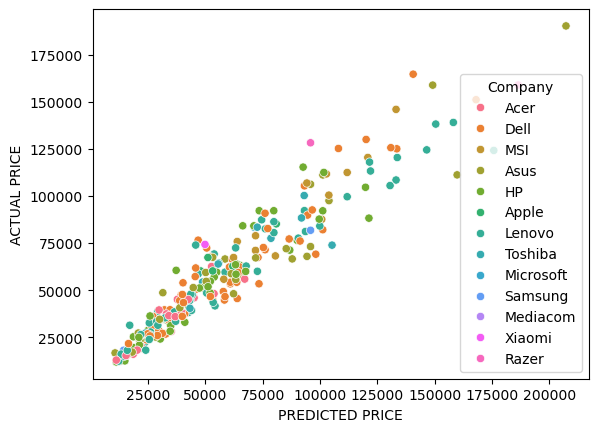

In [258]:
sns.scatterplot(x=np.exp(y_test),y= np.exp(y_pred) , hue = x_test['Company'] )
plt.xlabel('PREDICTED PRICE')
plt.ylabel('ACTUAL PRICE')
plt.show()